In [1]:
from IPython.display import display, HTML

display(HTML("<h1 style='color:purple; font-size: 40px;'>CIFAR-100 İLE DERİN ÖĞRENME VE CNN TABANLI GÖRSEL SINIFLANDIRMA</h1>"))


**Veri Seti Hakkında**

CIFAR-100
CIFAR-100 veri seti, 100 farklı sınıfa ait toplam 60.000 görüntü içerir. Her sınıf, 600 örnekten oluşur. Veri seti, 32x32 piksel boyutunda renkli görüntülerden oluşmaktadır.

Eğitim seti: 50.000 görüntü

Test seti: 10.000 görüntü

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # Görüntü işleme ve analiz için
import os  # Dosya ve dizin işlemleri için

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
print("CIFAR-100 veri seti başarıyla yüklendi.")
print(f"Eğitim seti boyutu: {x_train.shape}, Etiketler: {y_train.shape}")
print(f"Test seti boyutu: {x_test.shape}, Etiketler: {y_test.shape}")

# Veri kümesinin özellikleri
num_classes = np.unique(y_train).size
print(f"Toplam sınıf sayısı: {num_classes}")

# Örnek bir görüntü boyutu
print(f"Bir görüntünün boyutu: {x_train[0].shape}")

# Veri kümesinin veri tipleri
print(f"x_train veri tipi: {x_train.dtype}, y_train veri tipi: {y_train.dtype}")

CIFAR-100 veri seti başarıyla yüklendi.
Eğitim seti boyutu: (50000, 32, 32, 3), Etiketler: (50000, 1)
Test seti boyutu: (10000, 32, 32, 3), Etiketler: (10000, 1)
Toplam sınıf sayısı: 100
Bir görüntünün boyutu: (32, 32, 3)
x_train veri tipi: uint8, y_train veri tipi: int64


In [5]:
# Veri kümesinin özellikleri
num_classes = np.unique(y_train).size
print(f"Toplam sınıf sayısı: {num_classes}")

Toplam sınıf sayısı: 100


In [6]:
# Düzleştirme (Eğer y_train hala (50000, 1) şeklindeyse)
y_train = y_train.flatten()  # (50000, 1) -> (50000,)
y_test = y_test.flatten()    # (10000, 1) -> (10000,)

# Düzleştirilmiş etiketlerin boyutlarını kontrol et
print("Düzleştirilmiş Y_train boyutu:", y_train.shape)  # (50000,)
print("Düzleştirilmiş Y_test boyutu:", y_test.shape)    # (10000,)

Düzleştirilmiş Y_train boyutu: (50000,)
Düzleştirilmiş Y_test boyutu: (10000,)


In [7]:
# One-hot kodlama
num_classes = 100  # Sınıf sayısı
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# One-hot kodlama sonrası boyutları kontrol et
print("One-hot kodlama sonrası Y_train boyutu:", y_train.shape)  # (50000, 100)
print("One-hot kodlama sonrası Y_test boyutu:", y_test.shape)    # (10000, 100)

One-hot kodlama sonrası Y_train boyutu: (50000, 100)
One-hot kodlama sonrası Y_test boyutu: (10000, 100)


In [8]:
# Eğitim ve doğrulama setini ayır
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [9]:
# İlk 5 gözlemi kontrol et
print("Y_train ilk 5 etiket:", y_train[:5])

Y_train ilk 5 etiket: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

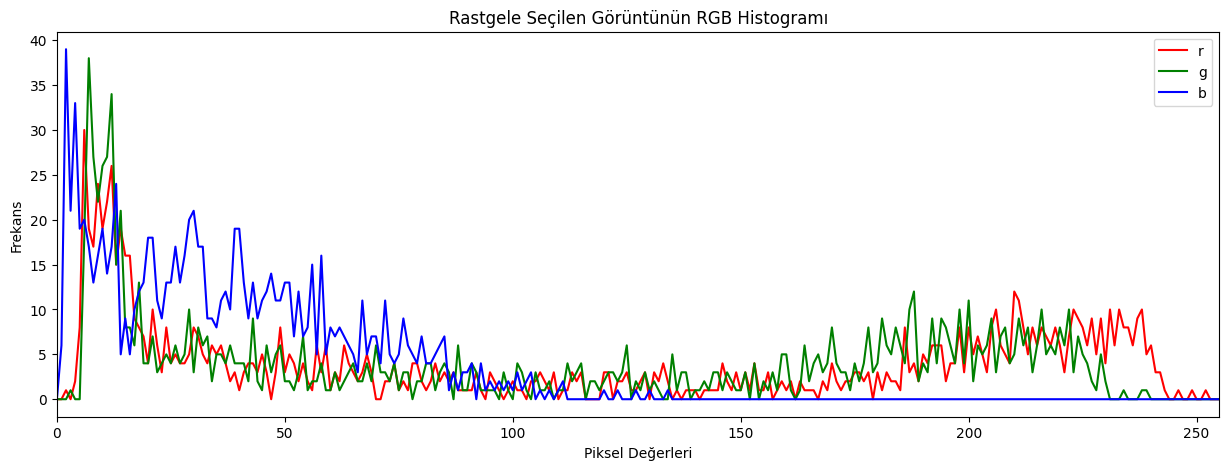

In [10]:
# Rastgele bir görüntü seçme
random_index = np.random.randint(0, x_test.shape[0])  # Test setinden rastgele bir indeks
random_image = x_test[random_index]  # Rastgele seçilen görüntü

# RGB histogramlarını oluşturma ve piksel yoğunluğuna göz atma
colors = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))
for i, color in enumerate(colors):
    hist, bins = np.histogram(random_image[:, :, i], bins=256, range=(0, 256))
    plt.plot(bins[:-1], hist, color=color)

plt.title('Rastgele Seçilen Görüntünün RGB Histogramı')
plt.xlabel('Piksel Değerleri')
plt.ylabel('Frekans')
plt.legend(colors)
plt.xlim([0, 255])
plt.show()

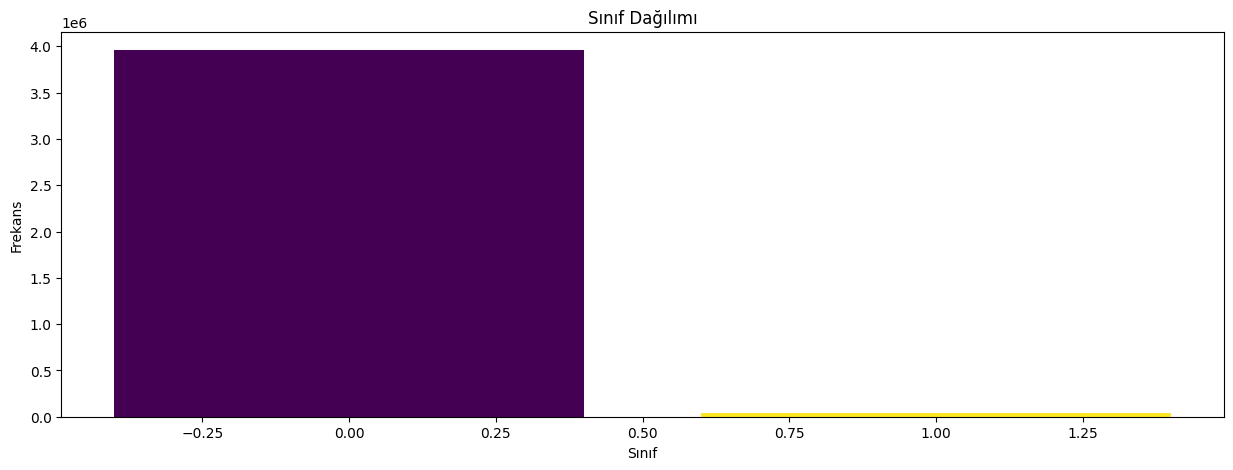

In [11]:
# Sınıf dağılımını inceleme
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Renkli çubuk grafiği için renkleri tanımlama
colors = plt.cm.viridis(np.linspace(0, 1, len(class_distribution)))  # Viridis renk paleti

# Sınıf dağılımını görselleştirme
plt.figure(figsize=(15, 5))
plt.bar(class_distribution.keys(), class_distribution.values(), color=colors)
plt.xlabel('Sınıf')
plt.ylabel('Frekans')
plt.title('Sınıf Dağılımı')
plt.show()


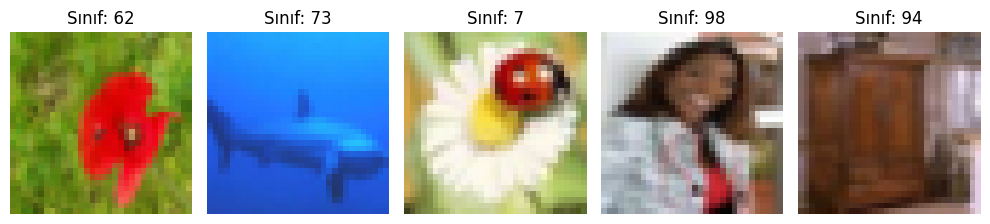

In [12]:
# 5 rastgele indeks seç
random_indices = np.random.choice(x_train.shape[0], size=5, replace=False)

# Görüntüleri ve etiketlerini elde et
random_images = x_train[random_indices]
random_labels = y_train[random_indices]

# Görüntüleri göster
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(random_images[i])
    plt.title(f"Sınıf: {random_labels[i].argmax()}")
    plt.axis('off')

plt.tight_layout()
plt.show()

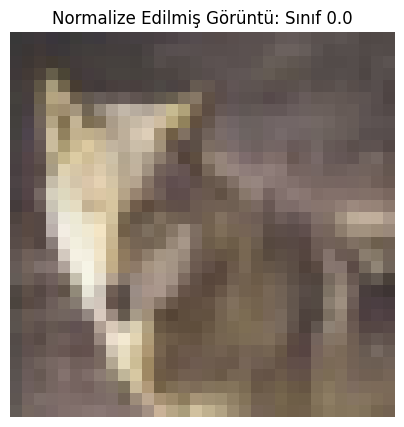

In [13]:
# Görüntüleri 0-1 aralığında normalize etme
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

# Rastgele bir görüntü seç
random_index = np.random.randint(0, x_train.shape[0])
random_image = x_train[random_index]

# Normalize edilmiş görüntüyü görselleştir
plt.figure(figsize=(5, 5))
plt.imshow(random_image)
plt.axis('off')
plt.title(f'Normalize Edilmiş Görüntü: Sınıf {y_train[random_index][0]}')
plt.show()


**Veri arttırma**

Model performansını arttırmak için kullandım.

In [14]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

datagen.fit(x_train)

# CNN Modeli Oluşturma

In [15]:
# Modeli Oluştur
model = Sequential()

# Konvolüsyon katmanları
model.add(layers.Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))  # Ekstra bir konvolüsyon katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten ve fully connected katman
model.add(Flatten())
model.add(Dense(512, activation='relu'))  # Daha fazla nöron
model.add(Dropout(0.5))  # Dropout ile overfitting'i önleme
model.add(Dense(num_classes, activation='softmax'))

# Modeli Derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping callback'ini tanımla
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğit
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,  # Epoch sayısını artırdık
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729795408.875351      72 service.cc:145] XLA service 0x7ed400004dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729795408.875421      72 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729795408.875426      72 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  5/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.0096 - loss: 4.6115

I0000 00:00:1729795413.588768      72 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.0284 - loss: 4.3945 - val_accuracy: 0.0968 - val_loss: 3.8139
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.1059 - loss: 3.8252 - val_accuracy: 0.1629 - val_loss: 3.4527
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.1456 - loss: 3.5668 - val_accuracy: 0.2165 - val_loss: 3.1896
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.1792 - loss: 3.3752 - val_accuracy: 0.2266 - val_loss: 3.1054
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.2081 - loss: 3.2264 - val_accuracy: 0.2749 - val_loss: 2.8631
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.2322 - loss: 3.0917 - val_accuracy: 0.2957 - val_loss: 2.7839
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.2545 - loss: 2.9937 - val_accuracy: 0.2991 - val_loss: 2.7492
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.2717 - loss: 2.8947 - val_accurac

# **Modelin Performansını Değerlendirme**

Modelin doğruluğu ve kayıpları değerlendirilerek sonuçlar raporlanacaktır.

### **Doğruluk ve Kayıp Grafikleri**

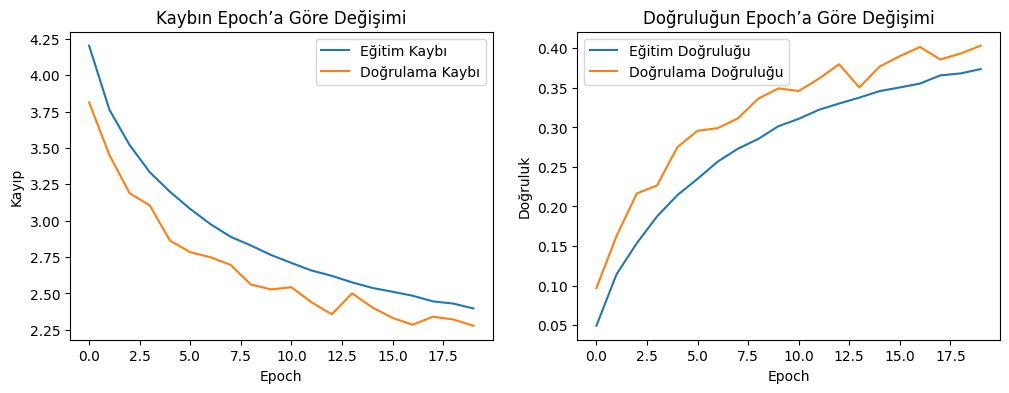

In [16]:
# Eğitim ve doğrulama kaybı
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kaybın Epoch’a Göre Değişimi')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# Eğitim ve doğrulama doğruluğu
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluğun Epoch’a Göre Değişimi')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

*Grafiklerimiz, model kaybının düşük ve model doğruluğunun yüksek olduğunu göstermektedir. Bu durum, modelimizin eğitim sürecinde verilerden etkili bir şekilde öğrenebildiğini ve öğrenilen bilgilerin yeni verilere de uygulanabilir olduğunu ortaya koymaktadır. Eğitim ve doğrulama metrikleri arasındaki denge, modelimizin başarıyla genelleme yapma yeteneğinin bir göstergesidir. Dolayısıyla, elde edilen sonuçlar, modelimizin tasarım ve öğrenme sürecinin başarılı olduğunu ortaya koymaktadır.*

In [17]:
# Eğitimden sonra test verileri üzerinden tahmin yapma
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
# F1 ve Recall hesaplama
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# Recall skoru hesapla
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Ağırlıklı Recall Skoru: {recall}")

# Tahminleri ikili hale getir
y_pred_classes = np.argmax(y_pred, axis=1)  # Sınıf tahminleri
y_true_classes = np.argmax(y_test, axis=1)  # Gerçek etiketler

# F1 skoru hesapla
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Ağırlıklı F1 Skoru: {f1}")

Ağırlıklı Recall Skoru: 0.4054
Ağırlıklı F1 Skoru: 0.3939671192207353


In [19]:
# Genel F1 skoru hesapla
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted', zero_division=0)
print(f"Ağırlıklı F1 Skoru: {f1}")

# İlk 10 tahmin için F1 ve Recall hesapla
y_pred_classes_first_10 = y_pred_classes[:10]
y_true_classes_first_10 = y_true_classes[:10]

f1_first_10 = f1_score(y_true_classes_first_10, y_pred_classes_first_10, average='weighted', zero_division=0)
recall_first_10 = recall_score(y_true_classes_first_10, y_pred_classes_first_10, average='weighted', zero_division=0)

print(f"İlk 10 tahmin için Ağırlıklı F1 Skoru: {f1_first_10}")
print(f"İlk 10 tahmin için Recall: {recall_first_10}")

Ağırlıklı F1 Skoru: 0.3939671192207353
İlk 10 tahmin için Ağırlıklı F1 Skoru: 0.3
İlk 10 tahmin için Recall: 0.3


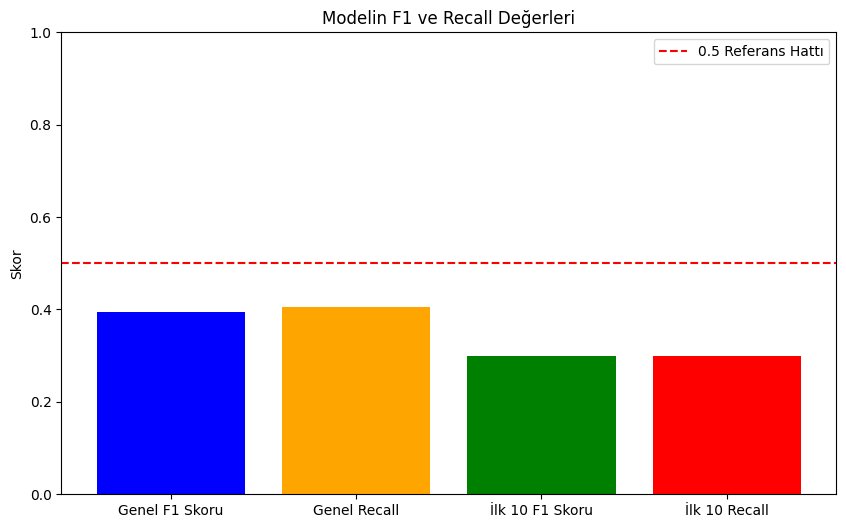

In [20]:
# Değerleri bir listeye kaydet
scores = [f1, recall, f1_first_10, recall_first_10]
labels = ['Genel F1 Skoru', 'Genel Recall', 'İlk 10 F1 Skoru', 'İlk 10 Recall']

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Skor')
plt.title('Modelin F1 ve Recall Değerleri')
plt.ylim(0, 1)  # Y eksenini 0-1 aralığına ayarlayın
plt.axhline(y=0.5, color='r', linestyle='--', label='0.5 Referans Hattı')  # Referans hattı
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


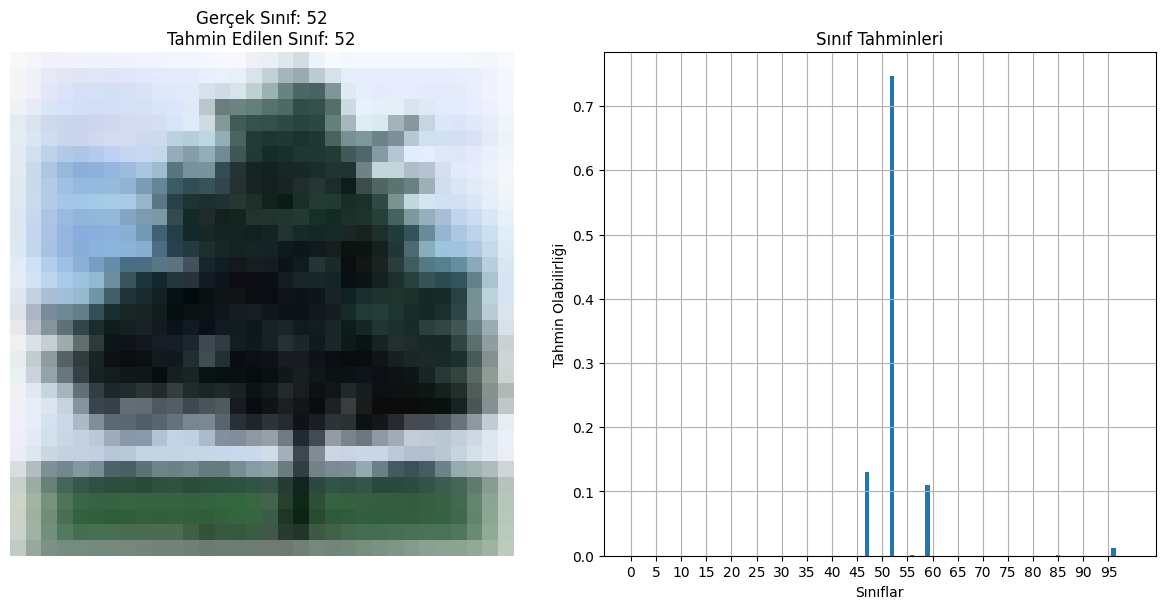

In [21]:
# Rastgele bir test görüntüsü seçme
random_index = np.random.randint(0, x_test.shape[0])
test_image = x_test[random_index]
test_image_reshaped = np.expand_dims(test_image, axis=0)  # Şekil değiştir

# Tahmin yapma
predictions = model.predict(test_image_reshaped)
predicted_class = np.argmax(predictions, axis=1)[0]

# Gerçek sınıfı alma
true_class = y_test[random_index].argmax()

# Görüntüyü ve tahmin grafiğini gösterme
plt.figure(figsize=(12, 6))

# Test görüntüsü
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title(f"Gerçek Sınıf: {true_class}\nTahmin Edilen Sınıf: {predicted_class}")
plt.axis('off')

# Tahmin grafiği
plt.subplot(1, 2, 2)
plt.bar(range(num_classes), predictions[0])
plt.title("Sınıf Tahminleri")
plt.xlabel("Sınıflar")
plt.ylabel("Tahmin Olabilirliği")
plt.xticks(np.arange(0, num_classes, step=5))  # Sınıf aralıkları
plt.grid()

plt.tight_layout()
plt.show()

In [22]:
# Test verisi üzerinde tahmin yap
y_scores = model.predict(x_test)  # y_scores, her sınıf için olasılıkları döndürecektir

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


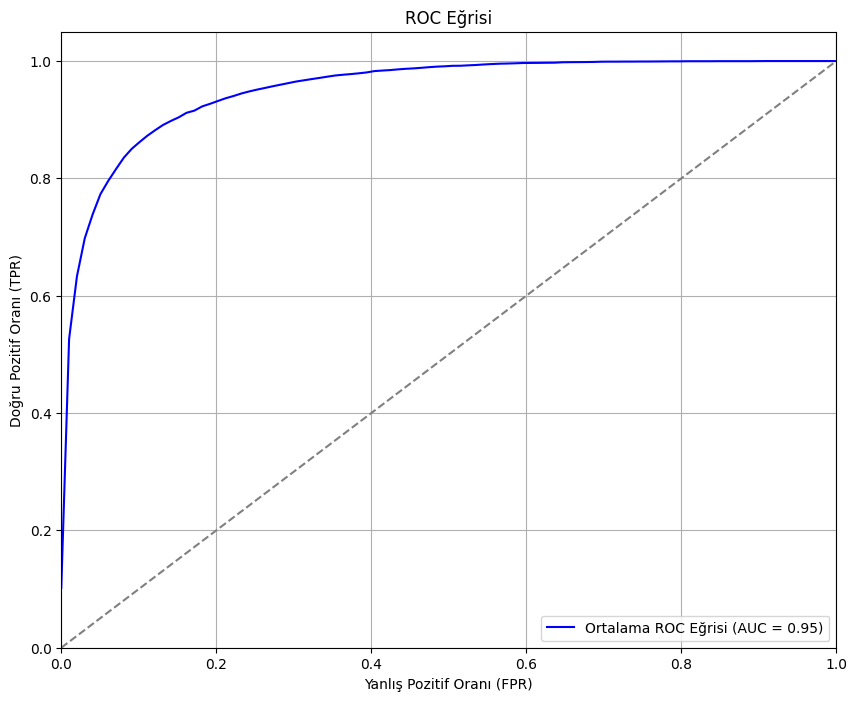

In [23]:
from sklearn.metrics import roc_curve, auc
# One-hot kodlu y_test değerlerini düzleştir
y_test_flat = np.argmax(y_test, axis=1)  # Gerçek etiketler

# Her sınıf için ROC eğrisi
n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# Her sınıf için ROC eğrisi hesapla
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test_flat == i).astype(int), y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tüm sınıfların AUC değerlerini ortalama al
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
mean_auc = auc(mean_fpr, mean_tpr)

# ROC Eğrisini çiz
plt.figure(figsize=(10, 8))
plt.plot(mean_fpr, mean_tpr, color='b', label='Ortalama ROC Eğrisi (AUC = {:.2f})'.format(mean_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Tesadüfi tahmin
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [24]:
# Model katmanlarını yazdırma
for layer in model.layers:
    print(layer.name)

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
conv2d_3
max_pooling2d_3
flatten
dense
dropout
dense_1


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,893,550 (11.04 MB)

 Trainable params: 964,516 (3.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,929,034 (7.36 MB)

# Karışıklık Matrisi

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


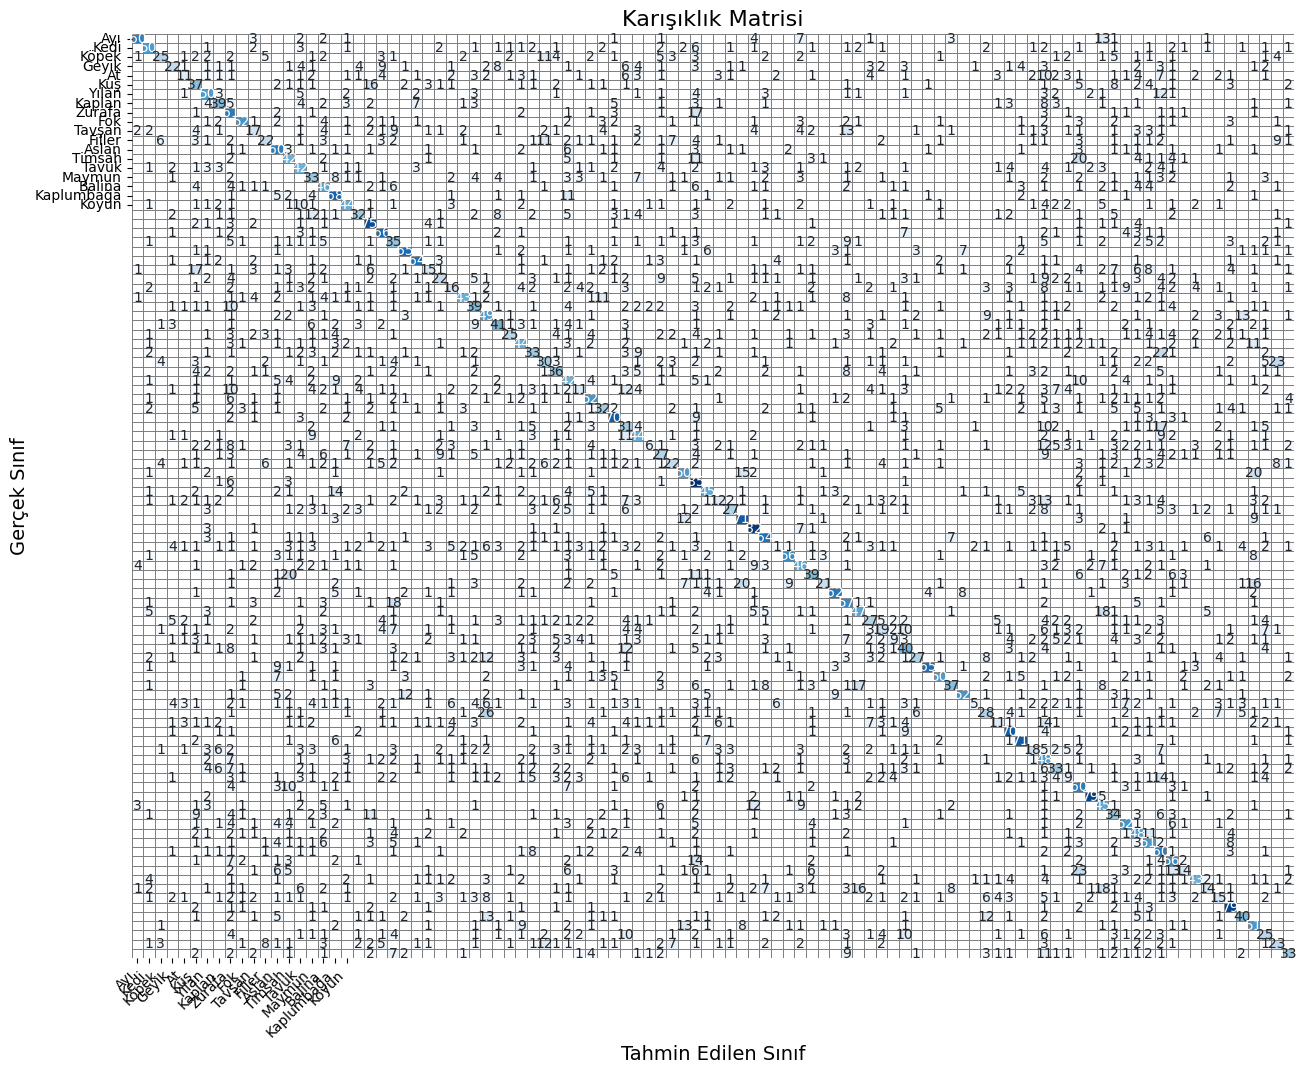

In [26]:
from sklearn.metrics import confusion_matrix
# Test verisi üzerindeki tahminleri al
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Karışıklık matrisini hesapla
cm = confusion_matrix(true_classes, predicted_classes)

# Sadece karışıklık olan sınıfları bul
mask = cm > 0  # Sadece 0'dan büyük olanları göster
cm_masked = np.where(mask, cm, np.nan)  # Diğerlerini NaN yaparak gizle

# Sınıf isimleri, yalnızca karışıklık olan sınıflar için kullanılacak
class_names = [
    'Ayı', 'Kedi', 'Köpek', 'Geyik', 'At', 'Kuş', 'Yılan',
    'Kaplan', 'Zürafa', 'Fok', 'Tavşan', 'Filler',
    'Aslan', 'Timsah', 'Tavuk', 'Maymun',
    'Balina', 'Kaplumbağa', 'Koyun'
]

# Karışıklık matrisi görselleştirme fonksiyonu
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(15, 12))
    sns.heatmap(cm_masked, annot=True, fmt='.0f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, cbar=False,
                linewidths=.5, linecolor='gray', mask=np.isnan(cm_masked))

    plt.ylabel('Gerçek Sınıf', fontsize=14)
    plt.xlabel('Tahmin Edilen Sınıf', fontsize=14)
    plt.title('Karışıklık Matrisi', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

# Karışıklık matrisini görselleştir
plot_confusion_matrix(cm, class_names)

## Dataframe


In [27]:
import pickle
# CIFAR-100 veri setinin yüklü olduğu dizin
directory = '/kaggle/input/cifar-100/cifar-100-python'

# CIFAR-100 veri setini yükle
def load_cifar100_meta(directory):
    with open(os.path.join(directory, 'meta'), 'rb') as file:
        data = pickle.load(file, encoding='latin1')  # 'latin1' kodlaması kullanılıyor
    return data

# Sınıf isimlerini al
cifar100_meta = load_cifar100_meta(directory)
class_names = cifar100_meta['fine_label_names']

# Sınıf isimlerini yazdır
print("CIFAR-100 Sınıf İsimleri:")
for i, class_name in enumerate(class_names):
    print(f"{i + 1}: {class_name}")

CIFAR-100 Sınıf İsimleri:
1: apple
2: aquarium_fish
3: baby
4: bear
5: beaver
6: bed
7: bee
8: beetle
9: bicycle
10: bottle
11: bowl
12: boy
13: bridge
14: bus
15: butterfly
16: camel
17: can
18: castle
19: caterpillar
20: cattle
21: chair
22: chimpanzee
23: clock
24: cloud
25: cockroach
26: couch
27: crab
28: crocodile
29: cup
30: dinosaur
31: dolphin
32: elephant
33: flatfish
34: forest
35: fox
36: girl
37: hamster
38: house
39: kangaroo
40: keyboard
41: lamp
42: lawn_mower
43: leopard
44: lion
45: lizard
46: lobster
47: man
48: maple_tree
49: motorcycle
50: mountain
51: mouse
52: mushroom
53: oak_tree
54: orange
55: orchid
56: otter
57: palm_tree
58: pear
59: pickup_truck
60: pine_tree
61: plain
62: plate
63: poppy
64: porcupine
65: possum
66: rabbit
67: raccoon
68: ray
69: road
70: rocket
71: rose
72: sea
73: seal
74: shark
75: shrew
76: skunk
77: skyscraper
78: snail
79: snake
80: spider
81: squirrel
82: streetcar
83: sunflower
84: sweet_pepper
85: table
86: tank
87: telephone
88:

In [28]:
# Boş listeler oluşturma
labels = []
paths = []

# Dizin içindeki dosyaları okuma
for filename in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, filename)):
        labels.append(filename)  # Dosya adı etiket olarak
        paths.append(os.path.join(directory, filename))  # Tam yol

# DataFrame oluşturma
df = pd.DataFrame({
    'label': labels,
    'path': paths
})

# DataFrame'i görüntüleme
print(df)

       label                                               path
0       meta      /kaggle/input/cifar-100/cifar-100-python/meta
1  file.txt~  /kaggle/input/cifar-100/cifar-100-python/file....
2       test      /kaggle/input/cifar-100/cifar-100-python/test
3      train     /kaggle/input/cifar-100/cifar-100-python/train
